In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [3]:
# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [6]:
model.fit(X_train,y_train)

GaussianNB()

In [7]:
model.score(X_test,y_test)

0.6730769230769231

In [8]:
model.predict(X_test)

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0.])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=10)

array([0.80952381, 0.61904762, 0.52380952, 0.61904762, 0.52380952,
       0.66666667, 0.66666667, 0.80952381, 0.65      , 0.5       ])

In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,
                 verbose=1, 
                 scoring=['recall'],
                 refit='recall') 
gs_NB.fit(X_train, y_train)
y_pred = gs_NB.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [11]:
gs_NB.cv_results_

{'mean_fit_time': array([0.00059986, 0.        , 0.00040011, 0.00040007, 0.00040007,
        0.00040002, 0.00040007, 0.00040016, 0.00040007, 0.00020003,
        0.00040011, 0.00040007, 0.00040011, 0.00040007, 0.00040002,
        0.00040011, 0.00019999, 0.00039997, 0.00040007, 0.00040011,
        0.00040011, 0.00040011, 0.00020003, 0.00040021, 0.00060015,
        0.00020003, 0.00020008, 0.00040011, 0.00040007, 0.00060019,
        0.00040016, 0.00019999, 0.00040007, 0.00100017, 0.00040011,
        0.00040016, 0.00040002, 0.00040007, 0.00040011, 0.00040016,
        0.00040016, 0.00040011, 0.00020003, 0.00040007, 0.00060015,
        0.0006001 , 0.00040007, 0.00040011, 0.00020003, 0.00040007,
        0.0006001 , 0.0006001 , 0.00020008, 0.00040002, 0.0006001 ,
        0.0006001 , 0.00020003, 0.00040007, 0.0006001 , 0.        ,
        0.00040011, 0.00040007, 0.00020003, 0.00020003, 0.00060005,
        0.00060015, 0.00019999, 0.00020008, 0.00059862, 0.0006001 ,
        0.00020003, 0.00020003,

Confusion Matrix:
 [[31 14]
 [ 1  6]]
Accuracy: 0.7115384615384616
Recall Score (Macro) 0.7730158730158729
Recall Score (Default) 0.8571428571428571
Precision Score (Macro) 0.634375
Precision Score (Default) 0.3
F1 Score (Macro): 0.6248196248196247
F1 Score (Default): 0.4444444444444444
ROC_AUC Score 0.773015873015873


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


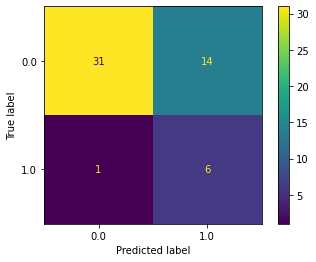

In [12]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(gs_NB, X_test, y_test)  
plt.show()

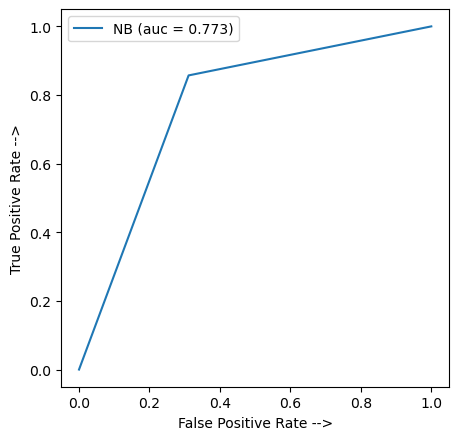

In [13]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='NB (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

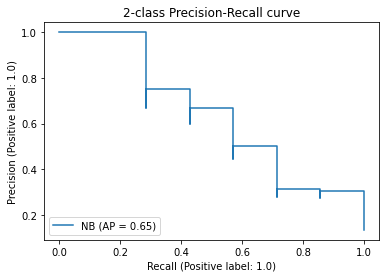

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gs_NB, X_test, y_test, name="NB"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")